# **EDA**
---
## Contexto
La fuente de datos de este etudio es el archivo Excel 'homicidios.xlsx', que contiene dos hojas o tablas, a saber, 'HECHOS' y 'VICTIMAS'. 

Cada registro de 'HECHOS' tiene datos de un accidente con fatalidad, donde en términos generales encontramos columnas con datos relativos al lugar, fecha y hora, y los participantes involucrados en el accidente.

Por otro lado, 'VICTIMAS' tiene por cada registro, datos relativos a las víctimas del accidente registrado en algún registro de 'HECHOS'. Estos dos set de datos se encuentran relacionados por las columnas 'ID' en 'HECHOS' y la columna 'ID_hecho' en 'VICTIMAS'.

## Limpieza manual previa realizada
Con el fin de mantener la debida trazabilidad respecto de la manipulación realizada a los datos originales, se informa que al inicio de este proyecto se realizó una revisión directa al archivo 'homicidios.xlsx' que funge como fuente de datos de este estudio. Los datos encontrados estaban bastante limpios y bien estructurados. Pese a lo anterior, se encontraron y corrigieron manualmente los siguientes errores:
1. En la hoja HECHOS, ID:2017-0108, la columna VICTIMA tiene como valor 'OBJETO FIJO'; sin embargo, en la hoja DICCIONARIO_HECHOS no se relaciona a 'OBJETO FIJO' como un valor válido para la columna VICTIMA. Se revisó en la hoja VICTIMAS para el mismo registro con ID:2017-0108, y se encontró que el valor en la columna VICTIMA es AUTO. Se hizo la respectiva correción en la hoja HECHOS.

2. Se encontraron los siguientes errores en algunos caracteres de las columnas 'LUGAR_DEL_HECHO', 'Calle', 'Cruce' y 'Dirección Normalizada'. El error consistía en que el texto mostraba un símbolo de incógnita '?' donde normalmente debería ir una 'Ñ'. Otros casos, correspondían a letras mayúsculas con tilde, y algunos otros requerían el circulito como super-índice al lado del número uno '1' para cambiarle el significado a 'primero'. Los elementos corregidos son...

CA?ADA DE GOMEZ

CASTA?ARES AV.

HUMBERTO 1?

NU?EZ

ORO?O, NICASIO

RODRIGUEZ PE?A

SAENZ PE?A, LUIS, PRES.

MAGARI?OS CERVANTES, A.

ALBARI?O

AUTOPISTA PRESIDENTE H?CTOR J. C?MPORA

MU?ECAS

## Carga de tablas para exploración inicial
Se cargarán los datos en los DataFrames 'df_hechos' y 'df_victimas' y revisaremos su estructura y contenido con ayuda de los métodos head(), info(), describe(), y nunique().

### Carga de tablas

In [1]:
import pandas as pd

# Ruta al archivo Excel homicidios.xlsx del Dataset Original
path = '../Datasets/Original/homicidios.xlsx'

# Carga el DataFrame df_hechos con los datos de la hoja 'HECHOS' en el archivo Excel
df_hechos = pd.read_excel(path, sheet_name='HECHOS')

# Carga el DataFrame df_victimas con los datos de la hoja 'VICTIMAS' en el archivo Excel
df_victimas = pd.read_excel(path, sheet_name='VICTIMAS')

## **Exploración inicial de df_hechos**

In [2]:
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PEÑA, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [4]:
df_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [5]:
df_hechos.nunique()

ID                       696
N_VICTIMAS                 3
FECHA                    598
AAAA                       6
MM                        12
DD                        31
HORA                     375
HH                        25
LUGAR_DEL_HECHO          683
TIPO_DE_CALLE              4
Calle                    277
Altura                   126
Cruce                    317
Dirección Normalizada    635
COMUNA                    16
XY (CABA)                606
pos x                    605
pos y                    605
PARTICIPANTES             41
VICTIMA                    9
ACUSADO                   10
dtype: int64

### Observaciones iniciales sobre df_hechos
A continuación las observaciones más relevantes que surgen de la revisión de los resultados obtenidos desde los métodos head(), info(), describe() y nunique() aplicados sobre df_hechos:

1. Columnas con valores nulos:
Las columnas 'Calle', 'Altura', y 'Cruce' tiene valores nulos. Es de esperar que 'Cruce' sea nulo cuando 'Altura' tenga un valor y viceversa. Sin embargo, 'Calle' siempre debe tener un valor. El razonamiento que lleva a esta conclusión es que un accidente siempre es reportado indicando la Calle en la que ocurrió, pero para que la indicación de lugar quede completa, se indica una Altura o un Cruce. Revisando la tabla, se observa que de ser necesario, sería posible imputar los valores faltantes en 'Calle' desde las columnas 'LUGAR_DEL_HECHO' o 'DIRECCION_NORMALIZADA'.

2. Tipos de datos:
La columna 'FECHA' ya se ha convertido al tipo de dato datetime64[ns], lo cual es de esperarse. Sin embargo, las columnas 'HORA', 'HH', 'XY (CABA)', 'pos x', y 'pos y' podrían necesitar una atención adicional para pasarlas del tipo 'object' a un tipo numérico apropiado.

3. Estadísticas descriptivas:
Poco se puede decir respecto a la estadística descriptiva de las variables numéricas de la tabla bajo revisión. Tal vez lo más relevante en este caso, se observa en la columna 'N_VICTIMAS', que tiene un valor máximo de 3, lo que indica que hay eventos con más de una víctima fatal.

4. Datos geoespaciales:
Las columnas 'XY (CABA)', 'pos x', y 'pos y' parecen contener información geoespacial. Lo más probable es que debamos convertirlas a un tipo numérico apropiado que nos permita usar esos datos con herramientas específicas para visualizar el lugar de los accidentes sobre un mapa, y así obtener información que pueda ser relevante en el estudio.

5. Columnas categóricas:
Las columnas 'TIPO_DE_CALLE', 'PARTICIPANTES', 'VICTIMA', y 'ACUSADO', parecen ser categóricas. Seguro serán útiles para realizar segmentación de los datos que ayude a observar información de accidentalidad asociada a algunas de esas categorías y realizar análisis específicos en torno a ellas. Con este propósito, la columna HH también podría servir como apoyo para la segmentación de los datos.

6. Cantidad de datos únicos:
La columna 'ID' tiene 696 valores únicos, lo que sugiere que es un identificador único, y por tanto, válido.

### Transformaciones iniciales sobre df_hechos
Con las observaciones del apartado anterior como base, se decide realizar las siguientes transformaciones sobre df_hechos...

#### Se cambia a tipo numérico las columnas 'pos x' y 'pos y'

In [6]:
# Pasa a números los datos tipo 'str' en 'pos x' y 'pos y', reemplazando con NaN cualquier dato que no represente un número
# Finalmente, astype('float') convierte en 'float' las columnas 'pos x' y 'pos y'.
df_hechos['pos x'] = pd.to_numeric(df_hechos['pos x'], errors='coerce').astype('float')
df_hechos['pos y'] = pd.to_numeric(df_hechos['pos y'], errors='coerce').astype('float')

#### Se busca eliminar las filas donde todas la columnas sean nulos

In [7]:
df_hechos.shape

(696, 21)

In [8]:
# Elimina las filas donde todos las columnas son nulos
df_hechos.dropna(how='all', inplace=True)
df_hechos.shape

(696, 21)

Ninguna fila tenía todas sus columnas con valor nulo.

#### Se busca eliminar las filas duplicadas

In [9]:
df_hechos.drop_duplicates(inplace=True)
df_hechos.shape

(696, 21)

No se encontraron filas duplicadas.

## **Exploración inicial de df_victimas**

In [10]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [11]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [12]:
df_victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


In [13]:
df_victimas.nunique()

ID_hecho               696
FECHA                  598
AAAA                     6
MM                      12
DD                      31
ROL                      5
VICTIMA                  8
SEXO                     3
EDAD                    86
FECHA_FALLECIMIENTO    563
dtype: int64

### Observaciones iniciales sobre df_victimas
Muestro a continuación, las observaciones más relevantes que surgen de la revisión de los resultados obtenidos desde los métodos head(), info(), describe() y nunique() aplicados sobre df_victimas:

1. Columnas con valores nulos:
No parece haber valores nulos en ninguna de las columnas del DataFrame df_victimas, ya que todas tienen 717 entradas no nulas.

2. Tipos de datos:
La columna 'FECHA' ya se ha convertido al tipo de dato datetime64[ns]. Sin embargo, la columna 'EDAD' podría ser numérica, pero actualmente está almacenada como tipo 'objeto'. Teniendo en cuenta que datos como el promedio de edad podría brindar información útil en el análisis, sería conveniente pasar la columna 'EDAD' a un tipo numérico. 

3. Estadísticas descriptivas:
En linea con lo indicado en el numeral anterior, el análisis podría beneficiarse de un estudio estadístico más detallado de la columna 'EDAD', para comprender la distribución de edades de las víctimas.

4. Cantidad de datos únicos:
La columna 'ID_hecho' tiene 696 valores únicos, lo que coincide con la cantidad de registros en 'df_hechos'. Esto confirma la idea inicialmente planteada de que 'df_hechos' y 'df_victimas' están relacionados por las columnas 'ID' y 'ID_hecho' respectivamente. 

5. Datos temporales:
La columna 'FECHA_FALLECIMIENTO' podría utilizarse para realizar análisis temporales y entender patrones de tiempo en relación con los fallecimientos, sobre todo si se considera la diferencia entre la fecha de fallecimiento y la fecha del accidente. Sin embargo, tal información no sería relevante para los objetivos planteados en este proyecto y sus respectivos KPI's. Por esta razón, la columna 'FECHA_FALLECIMIENTO', aunque inicialmente no lo pareciera, es candidata a ser eliminada.

6. Datos categóricos:
Las columnas 'ROL', 'VICTIMA' y 'SEXO' parecen tener datos categóricos, por lo que, junto con 'EDAD' -aunque es numérica-, podrían se útiles para segmentar los datos.


### Transformaciones iniciales sobre df_victimas
Con las observaciones del apartado anterior como base, se decide realizar las siguientes transformaciones sobre df_victimas...

#### Se cambia a tipo numérico la columna 'EDAD'

In [14]:
# Pasa a números los datos tipo 'str' en 'EDAD', reemplazando con NaN cualquier dato que no represente un número
# Finalmente, astype('Int64'), convierte la columna a un tipo entero
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce').astype('Int64')

#### Se busca eliminar las filas donde todas la columnas sean nulos

In [15]:
df_victimas.shape

(717, 10)

In [16]:
# Elimina las filas donde todas las columnas son nulos
df_victimas.dropna(how='all', inplace=True)
df_victimas.shape

(717, 10)

Ninguna fila tenía todas sus columnas con valor nulo.

#### Se busca eliminar las filas duplicadas

In [17]:
df_victimas.drop_duplicates(inplace=True)
df_victimas.shape

(717, 10)

No se encontraron filas duplicadas.

## **Otras transformaciones requeridas para df_hechos y df_victimas**
Al examinar estos DataFrames, se encontraron filas en df_hechos, cuyos 'ID' 2016-0151, y 2016-0174, tienen en la columna 'COMUNA' el valor 0, lo que es un error porque las comunas están categorizadas del 1 al 15. Considerando que gran parte de las columnas de estas filas tienen valores 'SD' o ningún valor, se decide eliminarlas de los DataFrames.

In [18]:
# Elimina de 'df_hechos' los registros con los valores '2016-0151' y '2016-0174' en la columna 'ID'
df_hechos.drop(df_hechos[df_hechos['ID'].isin(['2016-0151', '2016-0174'])].index, inplace=True)

# Elimina de 'df_victimas' los registros con los valores '2016-0151' y '2016-0174' en la columna 'ID'
df_victimas.drop(df_victimas[df_victimas['ID_hecho'].isin(['2016-0151', '2016-0174'])].index, inplace=True)

## **Carga de los datos limpios a la ruta especificada para albergarlos**

In [20]:
import pandas as pd

# Ruta al archivo Excel homicidios.xlsx del Dataset Original
path = '../Datasets/Clean/'

# Guarda el DataFrame 'df_hechos' en el archivo 'hechos.csv'
df_hechos.to_csv(path + 'hechos.csv', sep=';', index=False, encoding='utf-8', decimal=',')

# Guarda el DataFrame 'df_victimas' en el archivo 'victimas.csv'
df_victimas.to_csv(path + 'victimas.csv', sep=';', index=False, encoding='utf-8', decimal=',')

# **Obtención de insights e información de valor para el proyecto**
---

## **Análisis de tendencia**
Busca mostrar la evolución de la accidentalidad a lo largo del tiempo; en este caso, buscaremos ver como evoluciona la accidentalidad en CABA entre 2016 y 2021. El propósito principal de este análisis es observar si las medidas implementadas para el control de la accidentalidad han funcionado o no en el largo plazo -aunque también se puede realizar este tipo de análisis con el fin de evaluar el efecto de medidas de choque en la evolución de la accidentalidad en el corto plazo.

### Evolución anual de accidentes fatales

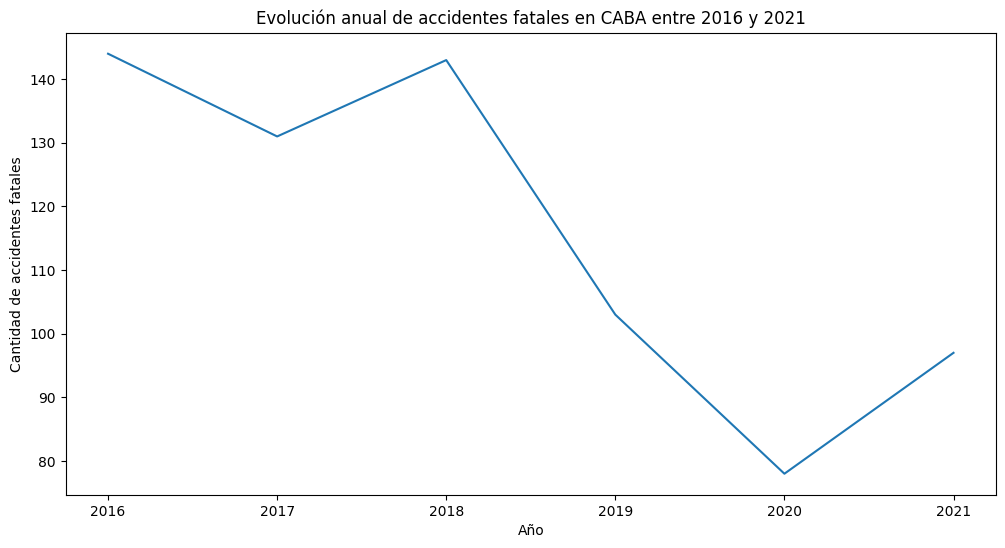

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa por año y cuenta la cantidad de accidentes
accidentes_por_año = df_hechos.groupby('AAAA')['ID'].count()

# Visualiza la evolución anual
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_año.index, y=accidentes_por_año.values)
plt.title('Evolución anual de accidentes fatales en CABA entre 2016 y 2021')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()

## **Análisis de estacionalidad**
Busca observar patrones de incremento en la accidentalidad asociados a sucesos que se repiten periódicamente, como por ejemplo la hora del día, el día de la semana, y el més del año. La identificación de tales patrones puede ayudar a tomar decisiones sobre patrullaje o control de tráfico con retenes en momentos específicos del día, o en días específicos de la semana, o en meses específicos del año. Identificar estos patrones también sirve para mejorar el timing de las campañas de educación y prevención tendientes a mejorar la seguridad vial.

### Análisis de franjas horarias

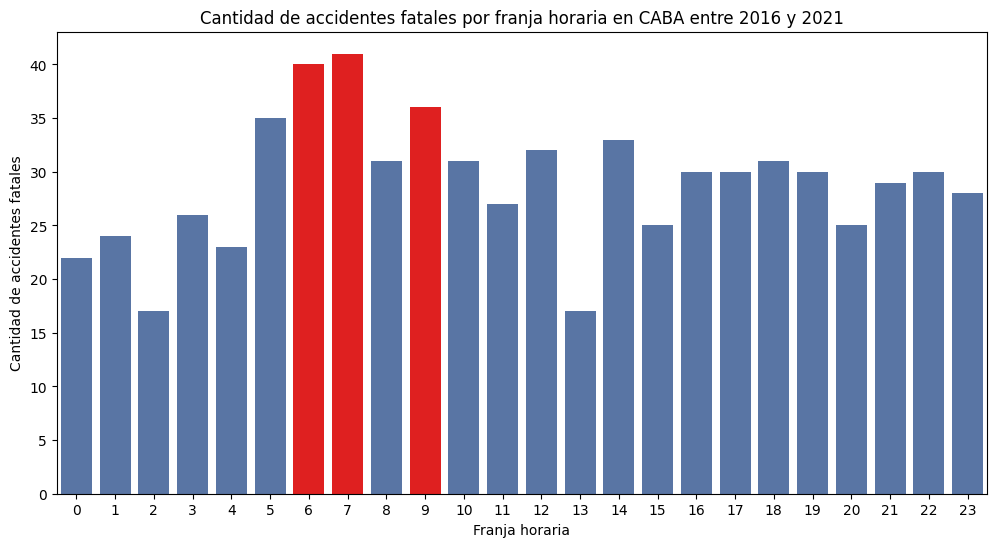

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Obtiene las tres franjas horarias con mayor conteo
top_HH = df_hechos['HH'].value_counts().head(3).index

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='HH', data=df_hechos, order=range(0, 24),
                   palette=['red' if HH in top_HH else sns.color_palette('deep')[0] for HH in range(0, 24)])

plt.title('Cantidad de accidentes fatales por franja horaria en CABA entre 2016 y 2021')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()

### Análisis por día de la semana

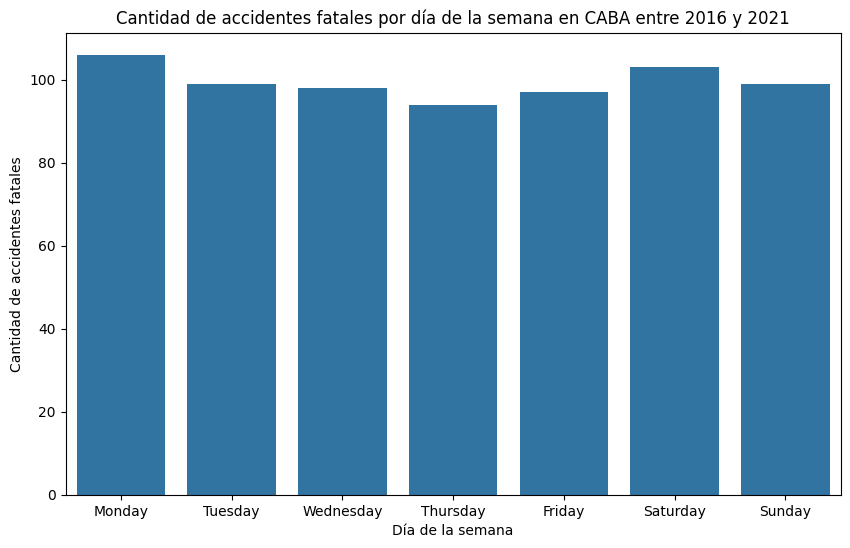

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_hechos['FECHA'].dt.day_name(), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Cantidad de accidentes fatales por día de la semana en CABA entre 2016 y 2021')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()

### Análisis por mes del año

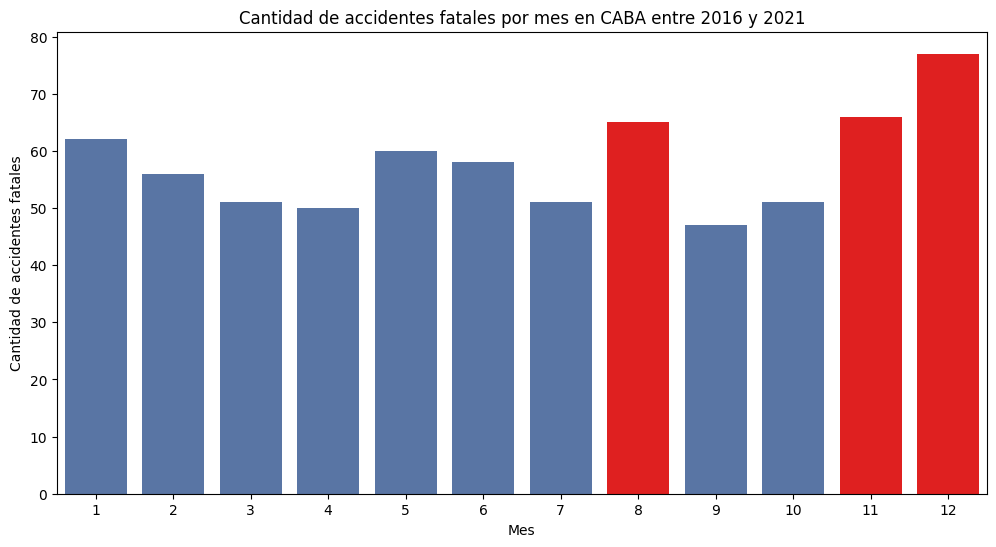

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Obtiene los tres meses con mayor conteo
top_months = df_hechos['MM'].value_counts().head(3).index

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MM', data=df_hechos, order=range(1, 13),
                   palette=['red' if month in top_months else sns.color_palette('deep')[0] for month in range(1, 13)])

plt.title('Cantidad de accidentes fatales por mes en CABA entre 2016 y 2021')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()

## **Análisis de localización de los accidentes**
Busca identificar el lugar de ocurrencia de los accidentes, con el fin de encontrar insights respecto a los sitios donde poner el foco de atención para la destinación de recursos que mejoren la infraestructura y señalización, e instauración de otras medidas que mejoren la seguridad vial. Se incluye la ubicación geo-espacial del lugar de los accidentes en un mapa de CABA. También la distribución de frecuencia de accidentes fatales en torno a Comunas y Cruces; estos últimos, de especial interés puesto que normalmente son lugares donde se concentra la accidentalidad.

### Ubicación geográfica de accidentes fatales en Ciudad Autónoma de Buenos Aires

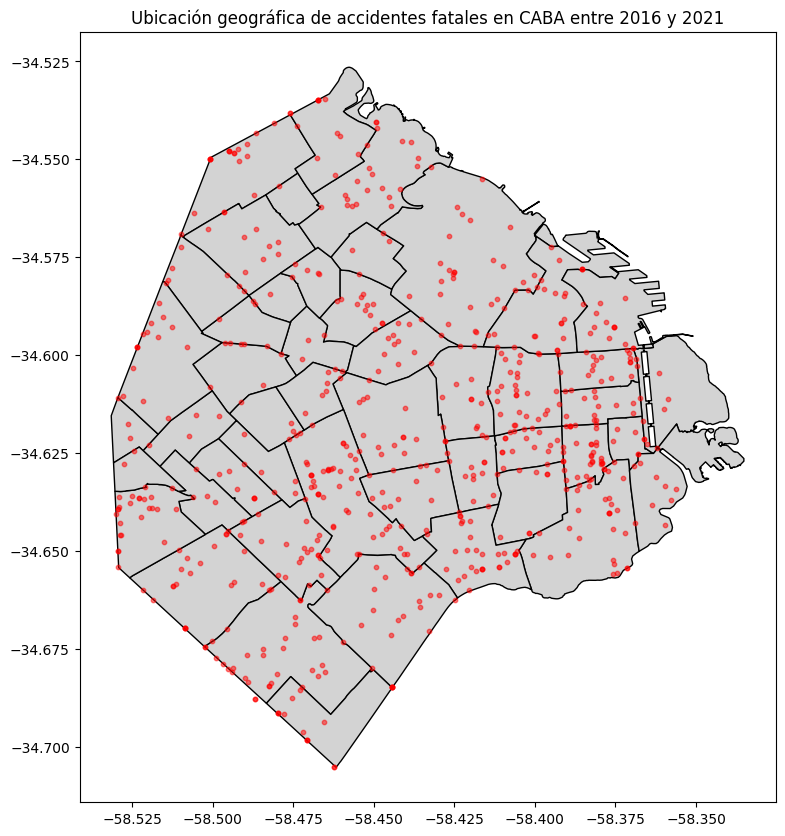

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Obtiene límites administrativos de Buenos Aires
buenos_aires = gpd.read_file('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson')

# Crea GeoDataFrame a partir de las coordenadas 'pos x' y 'pos y'
geometry = [Point(xy) for xy in zip(df_hechos['pos x'], df_hechos['pos y'])]
gdf = gpd.GeoDataFrame(df_hechos, geometry=geometry, crs='EPSG:4326')

# Visualiza los accidentes fatales como puntos en el mapa
ax = buenos_aires.plot(figsize=(15, 10), color='lightgrey', edgecolor='black')

gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Ubicación geográfica de accidentes fatales en CABA entre 2016 y 2021')
plt.show()

### Análisis por Comuna

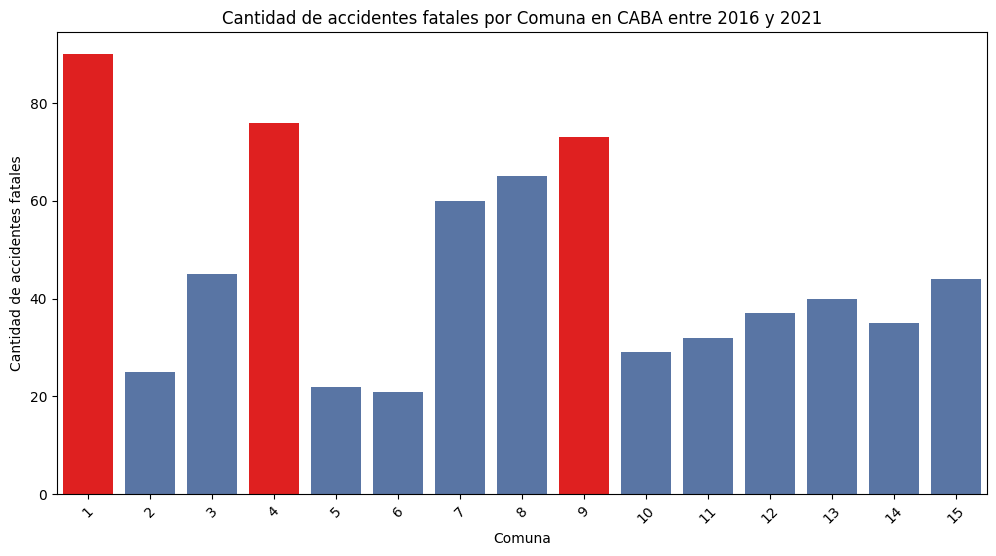

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Excluye la Comuna 0
df_hechos_sin_comuna_0 = df_hechos[df_hechos['COMUNA'] != 0]

# Obtiene las tres comunas con mayor conteo
top_comunes = df_hechos_sin_comuna_0['COMUNA'].value_counts().head(3).index

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='COMUNA', data=df_hechos_sin_comuna_0, order=range(1, 16),
                   palette=['red' if comune in top_comunes else sns.color_palette('deep')[0] for comune in range(1, 16)])


#sns.countplot(x='COMUNA', data=df_hechos_sin_comuna_0, order=df_hechos_sin_comuna_0['COMUNA'].values.sort())
plt.title('Cantidad de accidentes fatales por Comuna en CABA entre 2016 y 2021')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes fatales')
plt.xticks(rotation=45)
plt.show()

### Análisis de accidentalidad en cruces

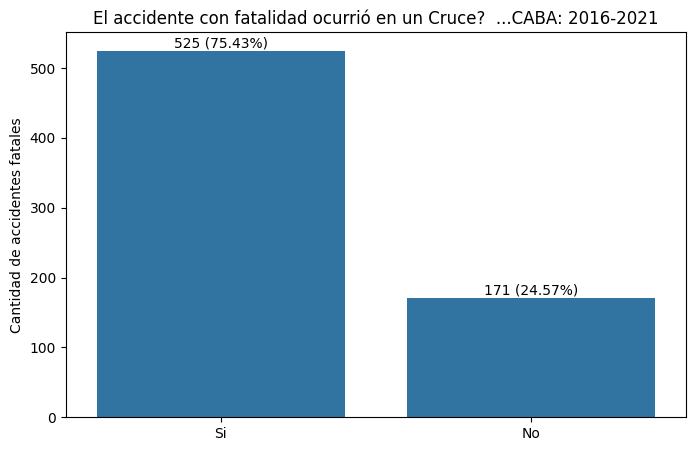

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una nueva columna 'Tipo Cruce' basada en la columna 'Cruce'
df_hechos['Tipo Cruce'] = df_hechos['Cruce'].apply(lambda x: 'Si' if pd.notnull(x) else 'No')

# Crea el gráfico de conteo con porcentaje
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Tipo Cruce', data=df_hechos, order=['Si', 'No'])

# Añade etiqueta con la cantidad y porcentaje en cada barra
total = len(df_hechos)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)} ({percentage:.2f}%)', ha='center')

plt.title('El accidente con fatalidad ocurrió en un Cruce?  ...CABA: 2016-2021')
plt.xlabel('')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()

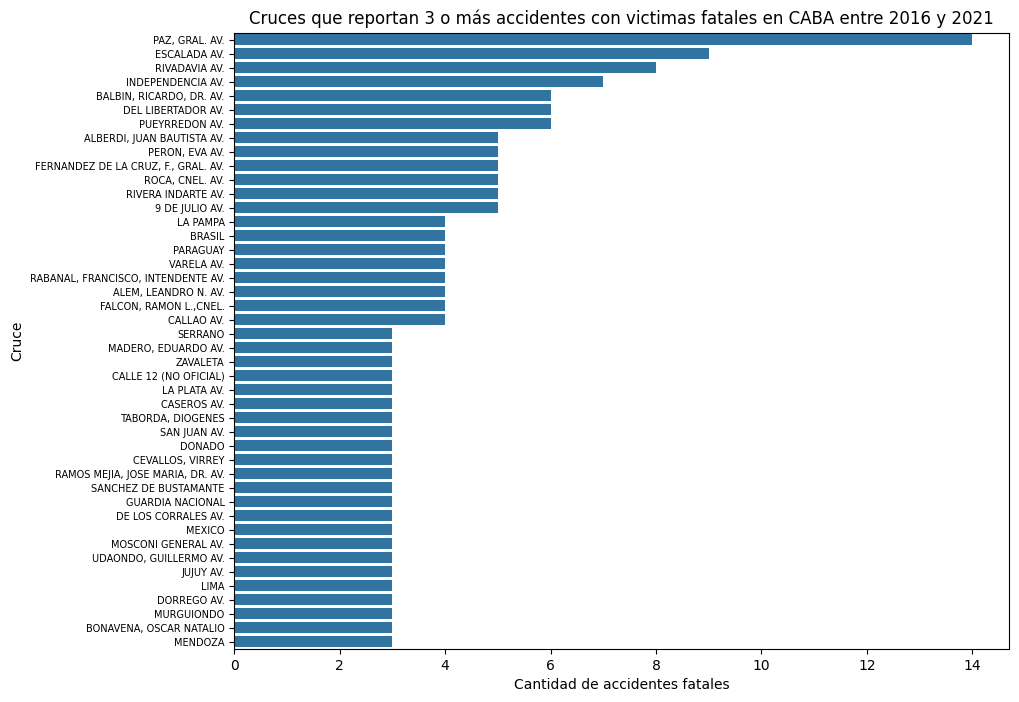

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cantidad de Barras a graficar
nBars = 120

# Filtra valores no nulos en la columna 'Cruce'
df_filtered = df_hechos[df_hechos['Cruce'].notnull()]

# Filtra por conteo superior a 2 en la columna 'Cruce'
df_filtered = df_filtered[df_filtered['Cruce'].isin(df_filtered['Cruce'].value_counts()[df_filtered['Cruce'].value_counts() > 2].index)]

# Obtiene el orden descendente de los valores por su conteo
order = df_filtered['Cruce'].value_counts().index[:nBars]

# Crea el gráfico de conteo con barras horizontales
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Cruce', data=df_filtered, order=order, orient='h')

# Ajusta el tamaño de texto en el eje 'y'
ax.tick_params(axis='y', labelsize=7)

plt.title('Cruces que reportan 3 o más accidentes con victimas fatales en CABA entre 2016 y 2021')
plt.xlabel('Cantidad de accidentes fatales')
plt.ylabel('Cruce')
plt.show()

## **Análisis demográfico de victimas**
Busca identificar la distribución de accidentalidad con fatalidad en torno a factores demográficos como el Sexo y Rango Etario de las víctimas; para usar dicha información como base en la toma de medidas que mejoren la seguridad vial, tal como el diseño de campañas educativas que apunten a la prevención de accidentes.

### Análisis por Sexo de la víctima

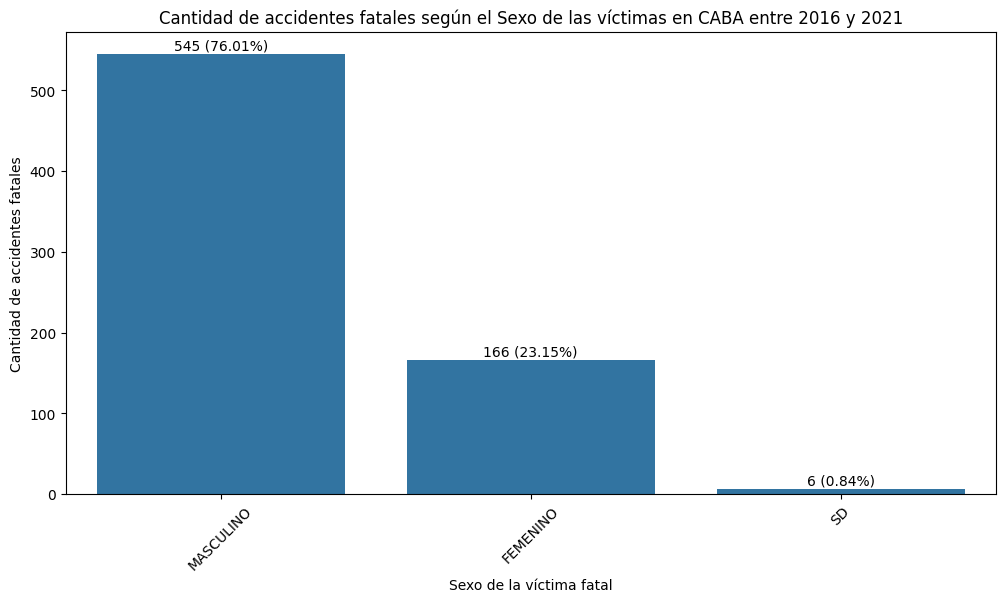

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtiene las categorías y cuenta la frecuencia de accidentalidad
order = df_victimas['SEXO'].value_counts().index

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='SEXO', data=df_victimas, order=order)

# Define etiquetas 'valor-absoluto (porcentaje)' con ajuste de posición vertical
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)} ({height / len(df_victimas) * 100:.2f}%)', ha='center')

plt.title('Cantidad de accidentes fatales según el Sexo de las víctimas en CABA entre 2016 y 2021')
plt.xlabel('Sexo de la víctima fatal')
plt.ylabel('Cantidad de accidentes fatales')
plt.xticks(rotation=45)
plt.show()

### Análisis por rango etario de las víctimas

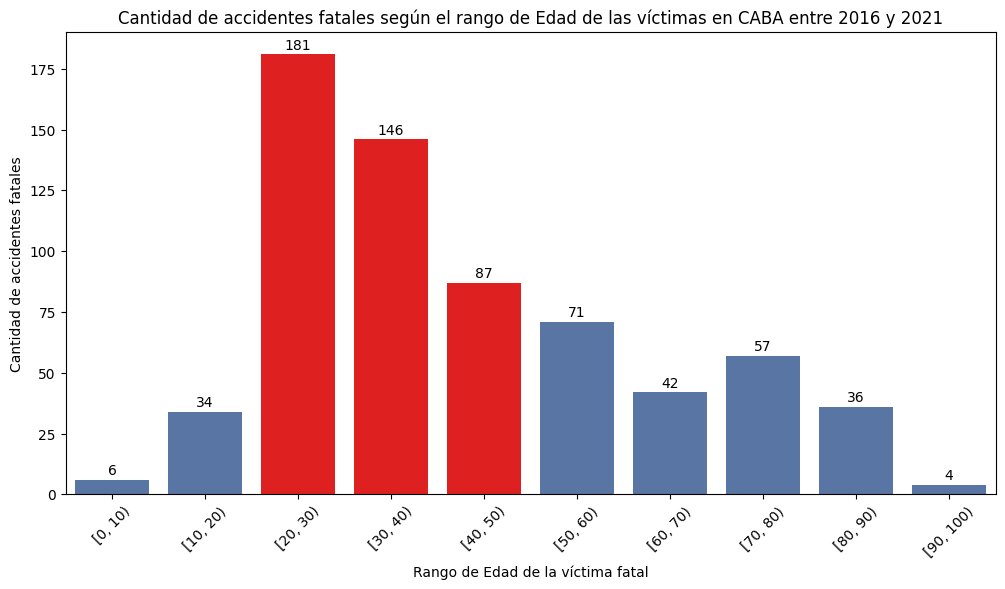

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Crea una nueva columna con las edades agrupadas en rangos de 10 años
df_victimas['Edad Agrupada'] = pd.cut(df_victimas['EDAD'], bins=range(0, 101, 10), right=False)

# Obtiene las tres comunas con mayor conteo
top_rango_etario = df_victimas['Edad Agrupada'].value_counts().head(3).index

# Obtiene las categorías y cuenta las frecuencias
order = df_victimas['Edad Agrupada'].value_counts().sort_index().index

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Edad Agrupada', data=df_victimas, order=order, 
                   palette=['red' if re in top_rango_etario else sns.color_palette('deep')[0] for re in range(0, 101, 10)])

# Define etiquetas 'valor-absoluto (porcentaje)' con ajuste de posición vertical
for p in ax.patches:
    height = p.get_height()
    #ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)} ({height / len(df_victimas) * 100:.2f}%)', ha='center')
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)}', ha='center')

plt.title('Cantidad de accidentes fatales según el rango de Edad de las víctimas en CABA entre 2016 y 2021')
plt.xlabel('Rango de Edad de la víctima fatal')
plt.ylabel('Cantidad de accidentes fatales')
plt.xticks(rotation=45)
plt.show()

## **Análisis de causalidad asociada al medio de movilización**
Busca encontrar patrones en la distribución de los accidentes fatales en torno al vehículo o medio de movilización de la víctima o acusado. El propósito es hallar insights que orienten la inversión efectiva de recursos en señalización e infraestructura, y permitan formular medidas restrictivas y campañas educativas en torno a la movilización segura en la red vial.

### Análisis según el medio de movilización de las víctimas

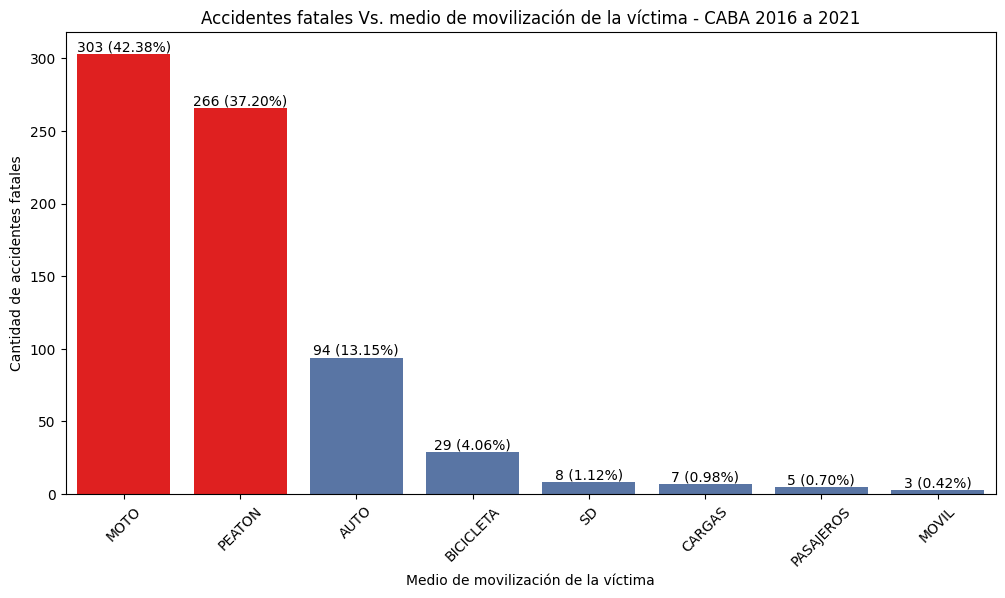

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Obtiene las categorías y cuenta la frecuencia de accidentalidad
order = df_victimas['VICTIMA'].value_counts().index

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='VICTIMA', data=df_victimas, order=order, palette=['red' if cat in order[:2] else sns.color_palette('deep')[0] for cat in order])

# Define etiquetas 'valor-absoluto (porcentaje)' con ajuste de posición vertical
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)} ({height / len(df_victimas) * 100:.2f}%)', ha='center')

plt.title('Accidentes fatales Vs. medio de movilización de la víctima - CABA 2016 a 2021')
plt.xlabel('Medio de movilización de la víctima')
plt.ylabel('Cantidad de accidentes fatales')
plt.xticks(rotation=45)
plt.show()

### Análisis según el medio de movilización de los acusados

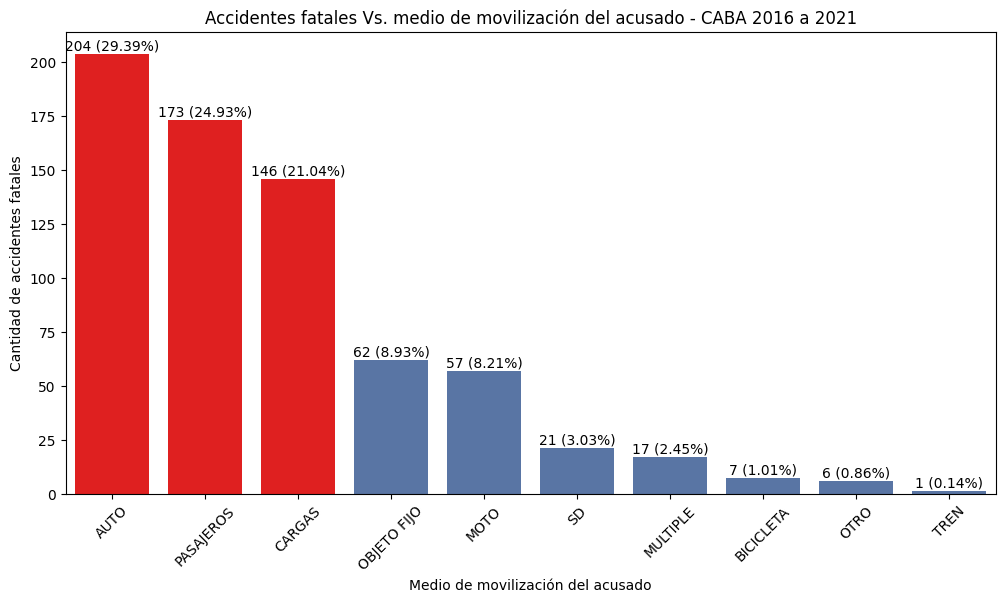

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Evita mensajes de advertencia 
warnings.filterwarnings("ignore")

# Obtiene las categorías y cuenta la frecuencia de accidentalidad
order = df_hechos['ACUSADO'].value_counts().index

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='ACUSADO', data=df_hechos, order=order, palette=['red' if cat in order[:3] else sns.color_palette('deep')[0] for cat in order])

# Define etiquetas 'valor-absoluto (porcentaje)' con ajuste de posición vertical
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)} ({height / len(df_hechos) * 100:.2f}%)', ha='center')

plt.title('Accidentes fatales Vs. medio de movilización del acusado - CABA 2016 a 2021')
plt.xlabel('Medio de movilización del acusado')
plt.ylabel('Cantidad de accidentes fatales')
plt.xticks(rotation=45)
plt.show()

## **Análisis de severidad**
Busca determinar la distribución de la cantidad de accidentes fatales en torno al número de víctimas producidas.

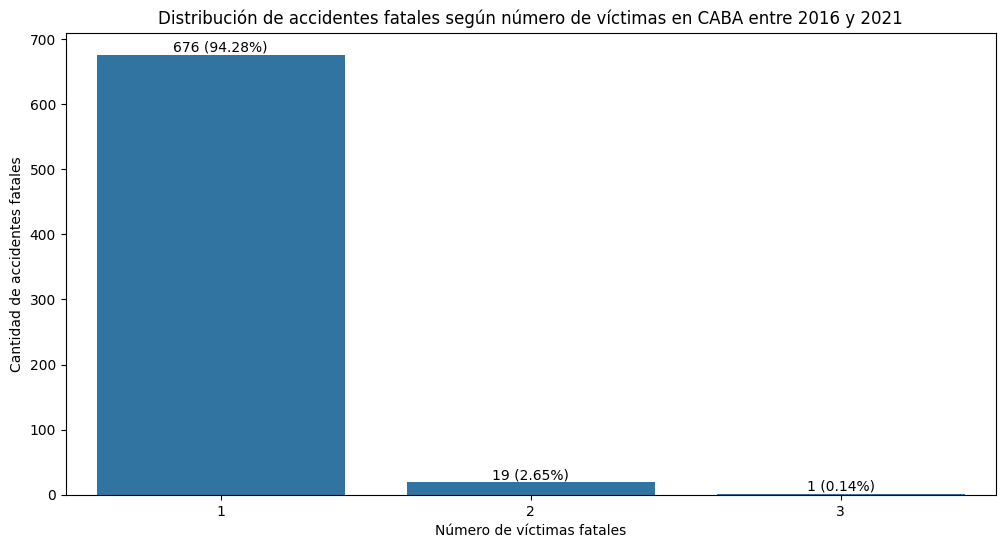

In [34]:
# Obtiene las categorías y cuenta las frecuencias de accidentes
order = df_hechos['N_VICTIMAS'].value_counts().index

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='N_VICTIMAS', data=df_hechos, order=order)

# Define etiquetas 'valor-absoluto (porcentaje)' con ajuste de posición vertical
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)} ({height / len(df_victimas) * 100:.2f}%)', ha='center')

plt.title('Distribución de accidentes fatales según número de víctimas en CABA entre 2016 y 2021')
plt.xlabel('Número de víctimas fatales')
plt.ylabel('Cantidad de accidentes fatales')
plt.show()